In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/NetworkIntrusion.csv")

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include="object")

,protocol_type,service,flag,class
count,22544,22544,22544,22544
unique,3,64,11,2
top,tcp,http,SF,anomaly
freq,18880,7853,14875,12833


In [ ]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'num_root', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [ ]:
print(df.shape)

(22544, 40)


In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
if missing_columns==[]:
   print("MISSING VALUES NOT PRESENT")
else:
   print("MISSING VALUES")
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count / total) * 100
    print(f"{col}: {null_count} ({round((per*100),2)}%)")

MISSING VALUES
src_bytes: 6 (2.66%)
dst_bytes: 6 (2.66%)
count: 9 (3.99%)
srv_count: 9 (3.99%)


In [ ]:
df['src_bytes'].fillna(df['src_bytes'].mean(), inplace=True)
df['dst_bytes'].fillna(df['dst_bytes'].mean(), inplace=True)
df['count'].fillna(df['count'].mean(), inplace=True)
df['srv_count'].fillna(df['srv_count'].mean(), inplace=True)


In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
if missing_columns==[]:
    print("MISSING VALUES NOT PRESENT")
else:
    print("MISSING VALUES")

for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count / total) * 100
    print(f"{col}: {null_count} ({round((per*100),2)}%)")

MISSING VALUES NOT PRESENT


In [ ]:
print(df["class"].value_counts())

class
anomaly    12833
normal      9711
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
def le(data):
  for col in df.columns:
    if df[col].dtypes=="object":
      label_encode=LabelEncoder()
      df[col]=label_encode.fit_transform(df[col])
le(df)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1,1,55,2,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [ ]:
x=df.drop(columns=["class"],axis=1)
y=df["class"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
rfc=RandomForestClassifier()
rfe=RFE(rfc,n_features_to_select=10)
rfe.fit(x,y)
feature_map=[(i,v) for i,v in itertools.zip_longest(rfe.get_support(),x.columns)]
selected=[v for i,v in feature_map if i==True]

In [ ]:
print(selected)

['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate']


In [ ]:
x=x[selected]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_scaled=sc.fit_transform(x_train)
xtest_scaled=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clss1=LogisticRegression(max_iter=1000)
clss1.fit(xtrain_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=clss1.predict(xtest_scaled)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)

[[2006  525]
 [ 327 1651]]
0.8110445775116434


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clss2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clss2.fit(xtrain_scaled, y_train)


KNeighborsClassifier()

In [ ]:
y_pred2=clss2.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test,y_pred2)
accuracy2=accuracy_score(y_test,y_pred2)
print(cm2)
print(accuracy2)

[[2477   54]
 [  78 1900]]
0.9707252162341983


In [ ]:
from sklearn.svm import SVC
clss3 = SVC(kernel = 'linear', random_state = 0)
clss3.fit(xtrain_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred3=clss3.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3=confusion_matrix(y_test,y_pred3)
accuracy3=accuracy_score(y_test,y_pred3)
print(cm3)
print(accuracy3)

[[2087  444]
 [ 407 1571]]
0.8112663561765359


In [ ]:
clss4=RandomForestClassifier()
clss4.fit(xtrain_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred4=clss4.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm4=confusion_matrix(y_test,y_pred4)
accuracy4=accuracy_score(y_test,y_pred4)
print(cm4)
print(accuracy4)

[[2501   30]
 [  36 1942]]
0.9853626081170991


In [ ]:
import tensorflow as tf


In [ ]:
ann=tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
ann.fit(xtrain_scaled,y_train,batch_size=32,epochs=100)

Epoch 1/100
564/564 [==============================] - 3s 3ms/step - loss: 0.5184 - accuracy: 0.7429
Epoch 2/100
564/564 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8638
Epoch 3/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.8998
Epoch 4/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.9051
Epoch 5/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2279 - accuracy: 0.9114
Epoch 6/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2187 - accuracy: 0.9193
Epoch 7/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9248
Epoch 8/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9275
Epoch 9/100
564/564 [==============================] - 1s 2ms/step - loss: 0.2021 - accuracy: 0.9305
Epoch 10/100
564/564 [==============================] - 1s 2ms/step - loss: 0.1976 - accura

In [ ]:
y_pred5 = ann.predict(xtest_scaled)
y_pred5 = (y_pred5 > 0.5)

141/141 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm5=confusion_matrix(y_test,y_pred5)
accuracy5=accuracy_score(y_test,y_pred5)
print(cm5)
print(accuracy5)

[[2469   62]
 [ 121 1857]]
0.959414504324684


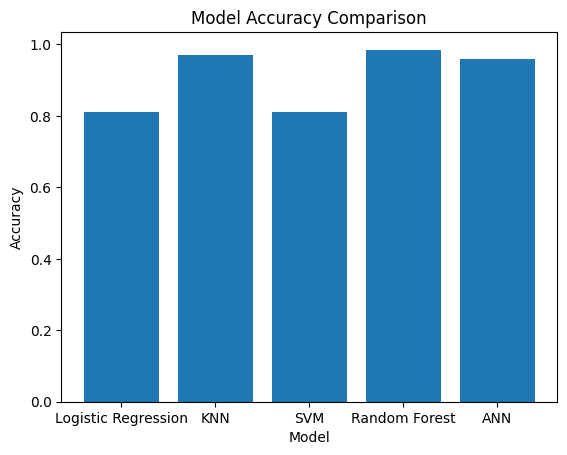

In [ ]:
import matplotlib.pyplot as plt
labels = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'ANN']
values = [accuracy, accuracy2, accuracy3, accuracy4, accuracy5]
plt.bar(labels, values)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clss4, X = xtrain_scaled, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 98.51 %
Standard Deviation: 0.21 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}
classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(xtrain_scaled, y_train)
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_ * 100))
print("Best Parameters:", best_parameters)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Accuracy: 98.49 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 30}


In [ ]:
classifier=RandomForestClassifier(n_estimators=20,criterion="gini")
classifier.fit(xtrain_scaled,y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred4=clss4.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_main=accuracy_score(y_test,y_pred4)
print("Best Accuracy: {:.2f} %".format(accuracy_main * 100))

Best Accuracy: 98.54 %


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred4)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2531
           1       0.98      0.98      0.98      1978

    accuracy                           0.99      4509
   macro avg       0.99      0.98      0.99      4509
weighted avg       0.99      0.99      0.99      4509



A Network Intrusion Detection System (NIDS) detects unauthorized access and malicious content by continuously monitoring both inbound and outbound network traffic. It analyzes this traffic for changes in activity and patterns, recognizing attack signatures within network packets. Upon detecting unusual activity, the NIDS alerts administrators to the potential threat, enabling them to take immediate actions to remove it. By leveraging advanced pattern recognition and behavioral analysis, NIDS ensures timely detection and response to security threats, enhancing the overall security and integrity of the network.

The increasing sophistication and frequency of cyber threats pose significant challenges to network security, highlighting the need for more effective detection mechanisms. Traditional measures often fall short in identifying and mitigating these advanced threats. Network Intrusion Detection Systems (NIDS) help by continuously monitoring network traffic for unauthorized access and malicious content. However, their efficacy is compromised by the vast volume and speed of modern network traffic, the need to adapt to evolving threats, and the difficulty in reducing false positives and false negatives. Complex attack patterns can also evade simple detection methods. Thus, enhancing NIDS with advanced pattern recognition and behavioral analysis is crucial for ensuring timely threat detection and response, ultimately improving network security and integrity.

We use machine learning in Network Intrusion Detection Systems (NIDS) because it enhances their capability to accurately and efficiently detect sophisticated and evolving cyber threats. Machine learning models can analyze complex patterns and behaviors in network traffic, improving detection accuracy and reducing false positives and negatives. They adapt to new threats by learning from ongoing data, ensuring the system remains effective against emerging attack techniques. Additionally, machine learning handles large volumes of data in real-time, enabling timely detection and response to security threats, thereby bolstering the overall security and integrity of the network.

The columns that are used in the dataset represent features derived from network packets. These features summarize various aspects of network traffic and connection behaviors, which are utilized in machine learning models to detect intrusions and classify network connections as either normal or malicious.

In the Network Intrusion Detection System (NIDS) context, machine learning is pivotal for effectively detecting evolving cyber threats. Leveraging features derived from network packets, preprocessed to fill null values and label encoded, advanced techniques like Recursive Feature Elimination (RFE) were employed for feature selection. I used various classification techniques such as Random Forest, Decision Tree including Artificial Neural Networks and etc. Random Forest emerged as the most effective, achieving an accuracy of 98.54%. Further optimization via Grid Search was conducted to fine-tune Random Forest parameters, enhancing its performance in detecting and classifying network intrusions.